[*********************100%***********************]  57 of 57 completed


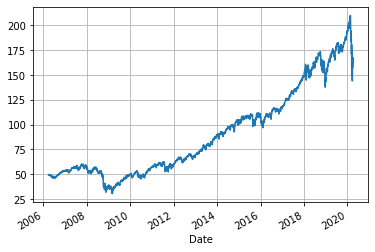

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:17:53 2020

@author: robert_normand
"""

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 

start_sp = datetime.datetime(2006,3,31)
end_sp = datetime.datetime(2020, 12,31)

# Use Vanguard ETF
# SP500 Index + 11 Industry


BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IWD','ITOT','IVW','IWB','IWR','DVY',
           'IVE','IWP','IWS','IWV','IUSG','IWO','IWN','IBB','IJK','IUSV',
           'OEF','IJS','IJJ','IYW','IHI','IJT','ITA','IGV','IYH','SOXX','EWC',
           'IGM','IYF','JKE','SUSA','IDU','IYY','IYG','JKD','IYC','IYJ','JKG',
           'IWC','IYK','JKF','JKH','IYT','JKI','IYZ','IGE','IYE','JKL','IYM',
           'JKJ','JKK','IGN']

Data = yf.download(BLack_ETF, start=start_sp, end=end_sp,group_by="ticker")

# To access data for SP500
SP500_dat=Data['IVW']

# To access the adjusted close price, use
Data['IVW']['Adj Close']

# Graph data
Data['IVW']['Adj Close'].plot(grid=True)

# To get Information about a ticker
SP500_detail = yf.Ticker("IVW")

# Show stock info
#SP500_detail.info


In [31]:
#SP500_dat

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-03-31,61.130001,61.189999,60.689999,60.900002,49.453735,176400.0
2006-04-03,61.400002,61.400002,60.700001,60.820000,49.388763,319500.0
2006-04-04,60.700001,61.180000,60.599998,61.000000,49.534924,185900.0
2006-04-05,61.000000,61.340000,60.970001,61.279999,49.762318,2110600.0
2006-04-06,61.150002,61.340000,60.880001,61.130001,49.640491,174800.0
...,...,...,...,...,...,...
2020-03-26,160.050003,167.899994,159.940002,166.889999,166.889999,4475100.0
2020-03-27,162.429993,166.250000,160.600006,161.710007,161.710007,1917900.0
2020-03-30,163.179993,167.779999,162.429993,167.559998,167.559998,3182300.0


In [3]:
#les rendements quotidiens
from pandas_datareader import data, wb
df = pd.DataFrame([data.DataReader(etf, 'yahoo', start_sp, end_sp)['Adj Close'] for etf in BLack_ETF]).T
df.columns = BLack_ETF
rendement = df.pct_change()
#rendement

C:\Users\Hermann\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# Mettre le rendement en 0 = descente 1= montée
j=1
for ticker in BLack_ETF:
    for j in range(len(rendement)):
        if rendement[ticker][j]<0:
            rendement[ticker][j]=0
        else:
            rendement[ticker][j]=1
rendement_bin=rendement
#rendement_bin

In [5]:
Data['IVV']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-03-31,130.289993,130.419998,129.559998,129.919998,97.379745,1533900.0
2006-04-03,130.250000,131.039993,129.759995,129.899994,97.364769,1538300.0
2006-04-04,129.889999,130.880005,129.559998,130.800003,98.039360,1111400.0
2006-04-05,130.809998,131.399994,130.600006,131.270004,98.391655,1257100.0
2006-04-06,131.059998,131.389999,130.399994,131.009995,98.196739,1010400.0
...,...,...,...,...,...,...
2020-03-26,250.330002,263.630005,249.899994,262.369995,262.369995,15886800.0
2020-03-27,254.000000,261.630005,251.779999,254.240005,254.240005,9514700.0
2020-03-30,256.529999,263.200012,254.369995,262.359985,262.359985,9539800.0


# Pour chacun des ETF, vous fournissez les statistiques de base

a.	Rendement moyen, volatilité, quantile, etc.

In [6]:
list_etf = []
for etf in BLack_ETF:
    list_etf.append(df[etf].describe())

b.	L’analyse peut être présentée sous forme de tableaux et graphiques 

In [7]:
#list_etf

In [8]:
df_describe = pd.DataFrame(list_etf)

In [9]:
#df_describe

2.	Par la suite, vous validez la performance des 5 indicateurs techniques appliqués sur chaque ETF

a.	Vous calculez la performance du signal

In [10]:
from Data_TP2_V2 import BBANDS, STOK, MACD, RSI, MFI

###### BollingerBands, Oscilateur stochastique, MACD, RSI, Money Flow

#### 1- Indicateurs

In [11]:
result_BB = pd.DataFrame()
result_STOK = pd.DataFrame()
result_MACD = pd.DataFrame()
result_RSI = pd.DataFrame()
result_MFI = pd.DataFrame()
for ticker in BLack_ETF:
    
    df = BBANDS(Data[ticker],"Close",21,2)
    result_BB[ticker+'_HIGH'] = df.iloc[:,-1]
    result_BB[ticker+'_LOW'] = df.iloc[:,-2]
    
    df = STOK(Data[ticker])
    result_STOK[ticker] = df.iloc[:,-1]
    
    df = MACD(Data[ticker],"Adj Close",5,25,9)
    result_MACD[ticker] = df.iloc[:,-1]
    result_MACD[ticker+'_SIGN'] = df.iloc[:,-2]
    result_MACD[ticker+'_DIFF'] = df.iloc[:,-3]
    
    df = RSI(Data[ticker],14)
    result_RSI[ticker] = df.iloc[:,-1]
    
    df = MFI(Data[ticker],14)
    result_MFI[ticker] = df.iloc[:,-1]
    

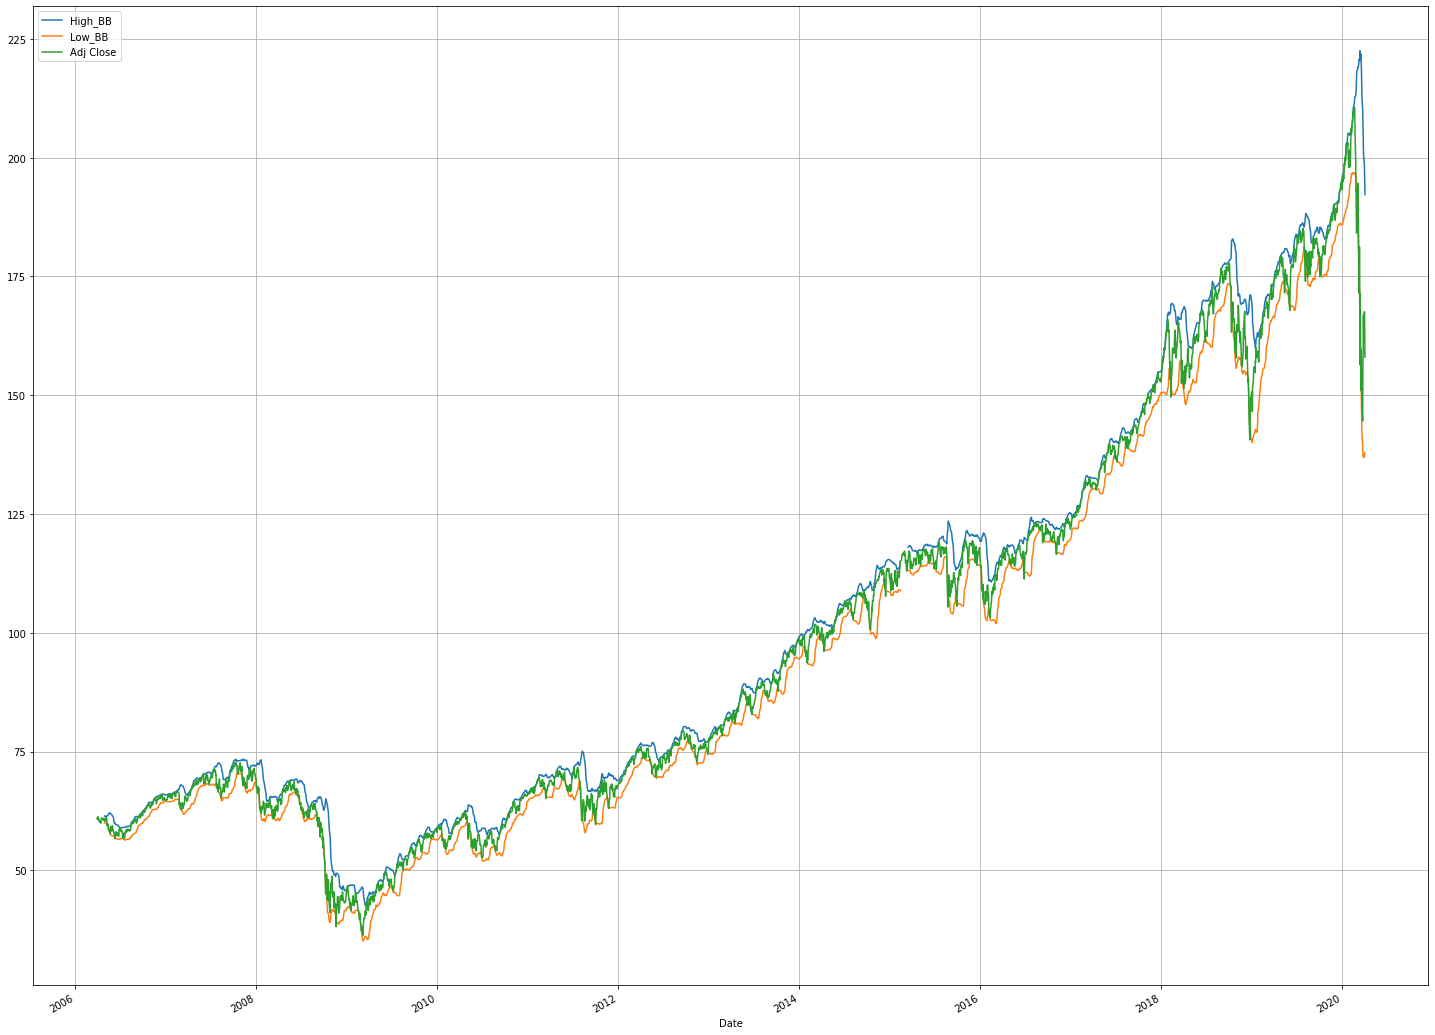

In [38]:
#Exemple de graphique
df = pd.DataFrame()
mycolumn=['IVW_UP','IVW_DOWN']
df['High_BB']= result_BB[mycolumn].iloc[:,-1]
df['Low_BB'] = result_BB[mycolumn].iloc[:,-2]
df['Adj Close'] = Data['IVW']['Close']
df.plot(grid=True, figsize = (25,20))

### 2 - Signal

#### Bollinger Bands

Pour Bollinger Bands si close price est supérieure à +2SD -> Long
                     ; si close price est inférieure à -2SD -> Short
                     ; sinon Neutral

In [ ]:
Signal_BBAND = Data
for ticker in BLack_ETF:   
    df = BBANDS(Data[ticker],"Close",21,2)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df['Open'] > df.iloc[:,-1]:
            Sig = 1
        elif df['Close'] < df.iloc[:,-2]:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_BBAND', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_BBAND')]))
    S2D[ticker] = S
    Signal_BBAND = Signal_BBAND.join(S2D)

#### Oscillateur stochastique

Pour Oscillateur stochastique si Stok =< 20 -> Long
                              ;si Stok >= 80 -> Short
                              ;sinon Neutral

In [ ]:
Signal_STOK = Data
for ticker in BLack_ETF:   
    df = STOK(Data[ticker])
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] <= 20:
            Sig = 1
        elif df.iloc[i,-1] >= 80:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_STOK', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_STOK')]))
    S2D[ticker] = S
    Signal_MACD = Signal_MACD.join(S2D)

#### MACD

Pour MACD si MACDdiff > 0 -> Long
          ;si MACDdiff < 0 -> Short
          ;si MACDdiff = 0 -> Neutral

In [163]:
Signal_MACD = Data
for ticker in BLack_ETF:   
    df = MACD(Data[ticker],"Adj Close",5,25,9)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] > 0:
            Sig = 1
        elif df.iloc[i,-1] == 0:
            Sig = 0
        else:
            Sig = -1
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MACD', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MACD')]))
    S2D[ticker] = S
    Signal_MACD = Signal_MACD.join(S2D)

#### RSI

Pour RSI si RSI =< 30 -> Long 
         ;si RSI >= 70 -> Short
         ;sinon neutral

In [ ]:
Signal_RSI = Data
for ticker in BLack_ETF:   
    df = RSI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_RSI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_RSI')]))
    S2D[ticker] = S
    Signal_RSI = Signal_RSI.join(S2D)

#### Money Flow Index

Pour Money Flow ;si MFI < 30 -> Long
                :si MFI > 70 -> Short
                :sinon neutral

In [ ]:
Signal_MFI = Data
for ticker in BLack_ETF:   
    df = RSI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MFI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MFI')]))
    S2D[ticker] = S
    Signal_MFI = Signal_MFI.join(S2D)

b.	Vous fournissez les statistiques sur la performance de la classification

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

1) Generic Accuracy

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
sklearn.metrics.auc(x, y)